In [ ]:
pip install scikit-learn


Sample Data:
    Player_ID  Matches_Played  Average_Score  Fitness_Level  Experience_Years  \
0          1              10             35              8                 2   
1          2              15             55              9                 4   
2          3               9             28              6                 1   
3          4              20             75             10                 6   
4          5              13             42              8                 3   

  Performance  
0        Poor  
1     Average  
2        Poor  
3        Good  
4     Average  

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00         1
        Good       1.00      1.00      1.00         3
        Poor       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00

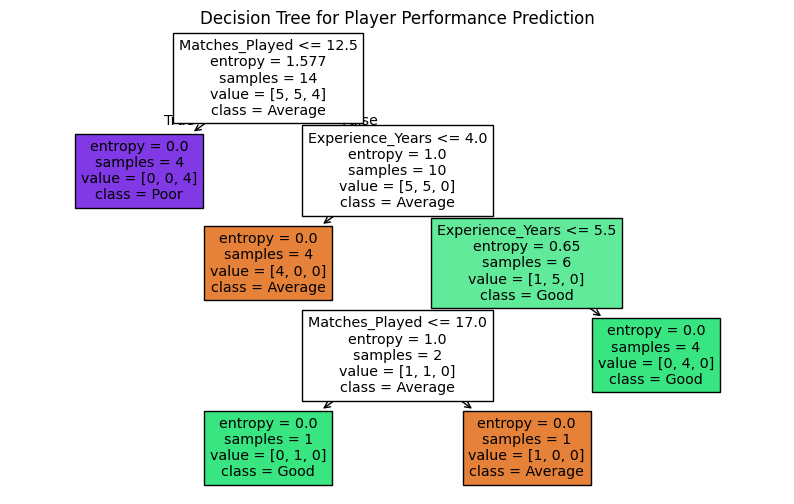

In [10]:
# --- Player Performance Prediction using Decision Tree ---

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 2: Create a synthetic sports dataset
data = {
    'Player_ID': range(1, 21),
    'Matches_Played': [10,15,9,20,13,8,25,18,22,12,14,19,16,11,17,23,24,21,10,15],
    'Average_Score': [35,55,28,75,42,20,80,58,65,39,45,70,60,34,49,68,74,63,27,40],
    'Fitness_Level': [8,9,6,10,8,5,10,9,9,7,8,9,9,6,8,9,10,8,5,7],
    'Experience_Years': [2,4,1,6,3,1,8,5,7,2,3,6,5,2,3,7,8,6,1,2],
}

df = pd.DataFrame(data)

# Step 3: Define target variable
def performance_label(score):
    if score >= 60:
        return "Good"
    elif score >= 40:
        return "Average"
    else:
        return "Poor"

df['Performance'] = df['Average_Score'].apply(performance_label)
print("Sample Data:\n", df.head())

# Step 4: Prepare features (X) and target (y)
X = df[['Matches_Played', 'Fitness_Level', 'Experience_Years']]
y = df['Performance']

# Step 5: Split data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title("Decision Tree for Player Performance Prediction")
plt.show()




